# Lab 4 - CNN
### Daniel Mehta

### Imports / Dataset Selection / PreProcessing Data

In [1]:
# imports
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random

In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#Print dataset shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
#normalize pixel values
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#Add channel dimension (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

#Onehot encode the labels (10 classes)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#print shape
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


### Building the CNN

In [5]:
#Initialize the model
model = models.Sequential()

In [6]:
#Convolution
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())

C:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Pooling
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.25))

In [8]:
#Second convolution layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.25))

In [9]:
# Flattening
model.add(tf.keras.layers.Flatten())

In [10]:
# Full Connection
model.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

In [11]:
#Output Layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # 10 classes is the softmax

### Training the CNN

In [12]:
#Compile Model
model.compile(optimizer='adam', #Adaptive optimizer
              loss='categorical_crossentropy', #multi class loss
              metrics=['accuracy'])

In [13]:
#Train the CNN
history = model.fit(x_train, y_train,
                    validation_split=0.2, #20% used for validation
                    epochs=20, # 20 training passes
                    batch_size=64, # Uses mini batchs of 64 sample
                    shuffle=True, # Shuffles the data each epoch
                    verbose=2) # Shows progress per epoch (not per batch)

Epoch 1/20
750/750 - 6s - 7ms/step - accuracy: 0.7914 - loss: 0.5995 - val_accuracy: 0.8665 - val_loss: 0.3817
Epoch 2/20
750/750 - 5s - 6ms/step - accuracy: 0.8544 - loss: 0.4091 - val_accuracy: 0.8778 - val_loss: 0.3258
Epoch 3/20
750/750 - 5s - 7ms/step - accuracy: 0.8703 - loss: 0.3587 - val_accuracy: 0.8920 - val_loss: 0.2922
Epoch 4/20
750/750 - 5s - 7ms/step - accuracy: 0.8785 - loss: 0.3354 - val_accuracy: 0.8988 - val_loss: 0.2762
Epoch 5/20
750/750 - 5s - 7ms/step - accuracy: 0.8850 - loss: 0.3169 - val_accuracy: 0.9033 - val_loss: 0.2613
Epoch 6/20
750/750 - 5s - 7ms/step - accuracy: 0.8895 - loss: 0.2998 - val_accuracy: 0.9040 - val_loss: 0.2556
Epoch 7/20
750/750 - 5s - 7ms/step - accuracy: 0.8941 - loss: 0.2889 - val_accuracy: 0.8953 - val_loss: 0.2724
Epoch 8/20
750/750 - 5s - 7ms/step - accuracy: 0.8981 - loss: 0.2797 - val_accuracy: 0.9101 - val_loss: 0.2383
Epoch 9/20
750/750 - 5s - 7ms/step - accuracy: 0.9014 - loss: 0.2705 - val_accuracy: 0.9129 - val_loss: 0.2322
E

### Plot

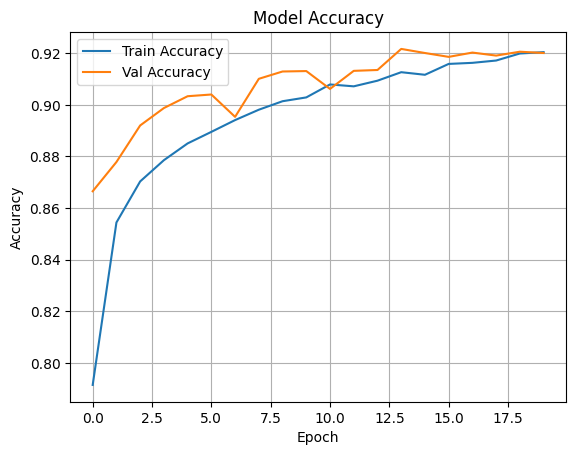

In [14]:
#training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

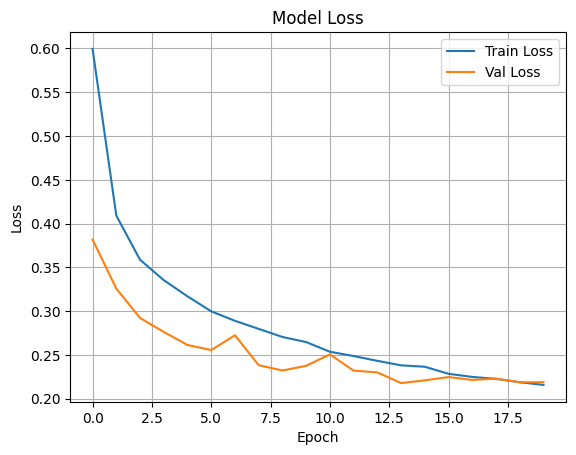

In [15]:
# Training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Eval test data

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9129 - loss: 0.2506
Test Accuracy: 0.9124
Test Loss: 0.2434


### Confusion Matrix

In [17]:
# Predict the class probabilities
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


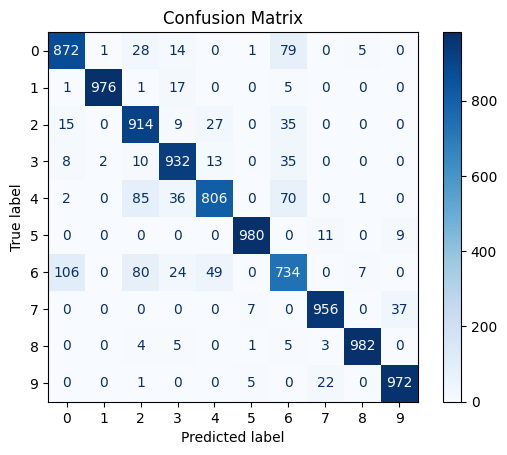

In [18]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Make Preditcions

In [19]:
# picks a random image from dataset
index = random.randint(0, len(x_test) - 1)
sample_image = x_test[index]
sample_label = np.argmax(y_test[index])

In [20]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat','Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sample_label_index = np.argmax(y_test[index])

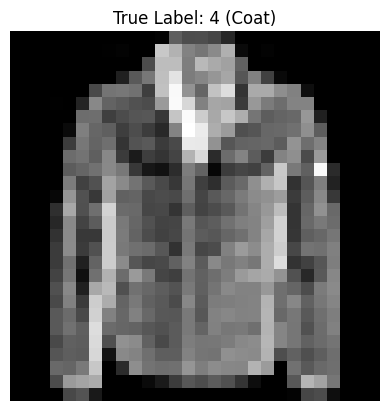

In [21]:
#shows selected image
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {sample_label_index} ({label_names[sample_label_index]})")
plt.axis('off')
plt.show()

In [22]:
# Predict class
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class} ({label_names[predicted_class]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: 4 (Coat)
